Імпортуємо бібліотеки
---

In [4]:
from seaborn import load_dataset 
import pandas as pd

Завантажуємо дані
--

In [5]:
df = load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Метод `describe` показує базову статистику

In [6]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [7]:
# приберемо порожні значення
df.dropna(inplace=True)

Дані для моделі
---
* У якості вхідного вектору використовуємо `bill_length_mm`
* У якості таргету - `body_mass_g`

In [8]:
X, y = df[['bill_length_mm']], df['body_mass_g']

Розділіть дані на тренувальні та тестувальні
--

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=5)

Натренуйте лінійну регресію на тестувальній вибірці
--

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
model.coef_

array([82.33792401])

In [13]:
model.intercept_

580.8697286154747

Порахуйте метрики на тренувальній та тестувальній вибірках
--

In [19]:
from sklearn.metrics import root_mean_squared_error
y_predictions_test = model.predict(X_test)
y_predictions_test


array([3676.77567157, 3849.68531201, 4623.66179775, 4804.80523058,
       3923.78944362, 3503.86603114, 4697.76592936, 4319.01147889,
       3627.37291717, 3676.77567157, 3948.49082082, 4327.24527129,
       4071.99770685, 4467.21974212, 3643.84050197, 4401.34940291,
       3792.0487652 , 4154.33563086, 3685.00946398, 4763.63626857,
       3545.03499315, 4598.96042054, 3668.54187917, 4417.81698771,
       3652.07429437, 4055.53012204, 4376.6480257 , 4566.02525093,
       4640.12938255, 4368.4142333 , 3841.4515196 , 4063.76391444,
       3545.03499315, 3536.80120075, 4615.42800534, 4705.99972176,
       4590.72662814, 3561.50257795, 4039.06253724, 4343.71285609,
       3701.47704878, 3989.65978283, 4277.84251688, 3421.52810713,
       4351.9466485 , 3841.4515196 , 4722.46730656, 4738.93489137,
       4302.54389409, 4878.90936219, 4738.93489137, 4113.16666885,
       4804.80523058, 3726.17842598, 3915.55565122, 3676.77567157,
       4491.92111932, 4384.8818181 , 4985.94866341, 3981.42599

In [21]:
y_predictions_train = model.predict(X_train)
y_predictions_train

array([4516.62249653, 4788.33764578, 3792.0487652 , 5051.81900262,
       4574.25904334, 4039.06253724, 3882.62048161, 4442.51836491,
       3462.69706914, 4738.93489137, 4730.70109896, 4409.58319531,
       4302.54389409, 4277.84251688, 4146.10183846, 4508.38870412,
       4080.23149925, 3627.37291717, 4681.29834456, 3989.65978283,
       3833.2177272 , 4697.76592936, 4409.58319531, 3520.33361595,
       3964.95840563, 3923.78944362, 4689.53213696, 3643.84050197,
       3594.43774756, 3767.34738799, 4137.86804606, 3536.80120075,
       4920.0783242 , 4351.9466485 , 3726.17842598, 4310.77768649,
       3685.00946398, 3503.86603114, 4286.07630928, 4878.90936219,
       3849.68531201, 4566.02525093, 4763.63626857, 3717.94463358,
       4211.97217767, 3890.85427401, 4656.59696735, 3717.94463358,
       3940.25702842, 4203.73838527, 4615.42800534, 4401.34940291,
       4697.76592936, 4681.29834456, 3808.51635   , 4137.86804606,
       3808.51635   , 4187.27080047, 5356.46932148, 4837.74040

In [23]:
rmse_test = root_mean_squared_error(y_test, y_predictions_test)
rmse_test

614.590410925435

In [24]:
rmse_train = root_mean_squared_error(y_train, y_predictions_train)
rmse_train

658.552335405915

Візуалізуйте
--

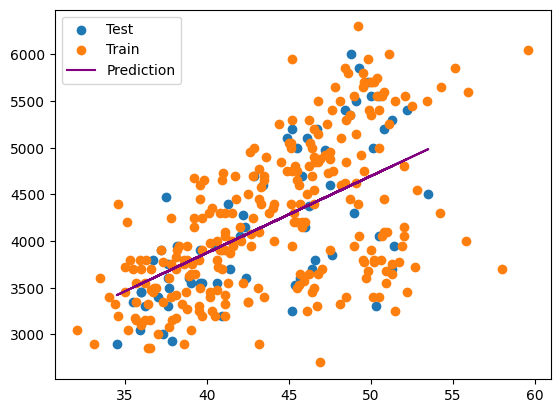

In [29]:
from matplotlib import pyplot as plt
plt.scatter(X_test, y_test, label= 'Test')
plt.scatter(X_train, y_train, label='Train')
plt.plot(X_test, y_predictions_test, label='Prediction', color='purple')
plt.legend()
plt.show()

### Додатково(2 ознаки - 'bill_length_mm', 'flipper_length_mm')

In [41]:
train, test = train_test_split(df, test_size=0.2, random_state=6)

In [42]:
model.fit(train[['bill_length_mm', 'flipper_length_mm']], train['body_mass_g'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
model.coef_

array([ 6.24233979, 47.81690173])

In [44]:
model.intercept_

-5668.182072708769

In [45]:
predictions = model.predict(test[['bill_length_mm', 'flipper_length_mm']])
predictions

array([2998.53469099, 3599.55469216, 4842.41901776, 4065.73725915,
       3592.06388441, 3659.85627346, 3708.29740917, 3521.77455945,
       3880.71199202, 5163.65329697, 4595.84370137, 3662.35320938,
       3664.85014529, 3585.19731065, 4690.47815151, 5206.47632686,
       3538.87799152, 3805.42879523, 3445.49200933, 3577.95561754,
       5701.74877622, 3767.59963716, 3400.7962775 , 3943.2613946 ,
       4021.66576129, 3654.86240163, 4848.66135755, 3802.93185931,
       3948.63038577, 5540.57040499, 5716.48127707, 5153.66555331,
       5559.92165833, 3561.97464873, 3567.96787388, 3870.10001438,
       4021.66576129, 5455.54857917, 3471.3347171 , 3412.6567231 ,
       5135.56276792, 4656.14528268, 3966.35805182, 5633.08303855,
       3358.59748158, 3202.28697748, 4146.14033247, 3970.47857503,
       3729.77047909, 4828.31075089, 3181.0630222 , 4544.28139577,
       3593.31235237, 5261.78403634, 5357.4178398 , 3661.35385606,
       4859.27333519, 4704.58641838, 4204.1940925 , 4751.15485